In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from help_plot import plot_decision_regions

# Random Forests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

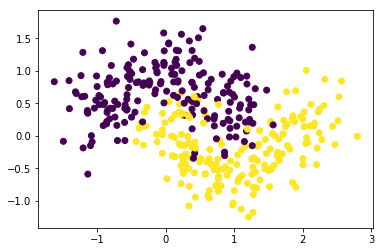

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

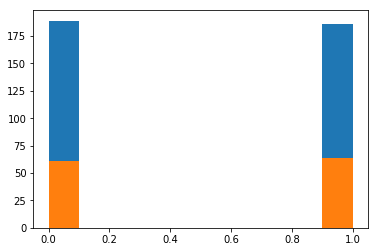

In [4]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [7]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [9]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.952

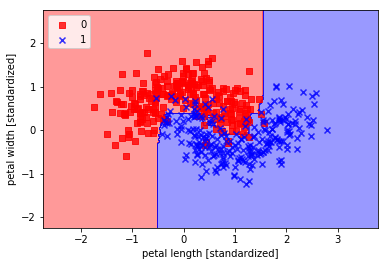

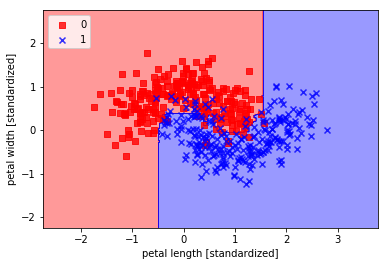

In [18]:
from help_plot import plot_decision_regions


plot_decision_regions(X, y, classifier=rnd_clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


plot_decision_regions(X, y, classifier=bag_clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
ext_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

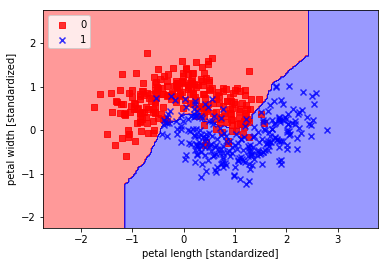

In [22]:
plot_decision_regions(X, y, classifier=ext_clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()